In [1]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import re
plt.style.use("bmh")
%matplotlib inline

In [2]:
balance = pd.read_csv("supply_energy.csv", header=2, index_col=2)
balance

,opt,Unnamed: 1,Co2L0-2H-EQ0.8c-off,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c1-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c5-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c7-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c9-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c11-mdes+e0.3,Co2L0-2H-EQ0.8c-MDES+c1-mdes+c13-mdes+e0.3,...,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c13-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c15-mdes+e0.7,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c1-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c3-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c5-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c7-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c9-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c11-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c13-mdes+e0.8,Co2L0-2H-EQ0.8c-MDES+c150-mdes+c15-mdes+e0.8
biomass,AC,generators,7.104211e+07,7.802172e+07,7.825980e+07,7.622689e+07,7.410517e+07,7.293286e+07,7.444912e+07,7.584843e+07,...,7.104582e+07,7.104663e+07,7.104633e+07,7.104846e+07,7.104543e+07,7.104856e+07,7.104596e+07,7.104535e+07,7.104539e+07,7.104703e+07
geothermal,AC,generators,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
nuclear,AC,generators,4.727470e+08,5.217917e+08,5.224998e+08,5.402356e+08,5.423597e+08,5.297156e+08,5.184512e+08,5.033316e+08,...,4.727680e+08,4.727721e+08,4.727773e+08,4.727654e+08,4.727664e+08,4.727669e+08,4.727677e+08,4.727689e+08,4.727608e+08,4.727825e+08
offwind-ac,AC,generators,3.896419e+07,3.487575e+07,3.398811e+07,3.327208e+07,3.636619e+07,3.390608e+07,3.466051e+07,3.878705e+07,...,3.601744e+07,3.608685e+07,3.892057e+07,3.891467e+07,3.601573e+07,3.891377e+07,3.601719e+07,3.601715e+07,3.600686e+07,3.608524e+07
offwind-dc,AC,generators,6.869355e+07,6.550810e+07,6.536313e+07,6.490178e+07,6.790903e+07,6.768524e+07,6.869311e+07,6.475598e+07,...,6.863746e+07,6.837115e+07,6.831752e+07,6.832041e+07,6.863628e+07,6.831385e+07,6.863235e+07,6.861459e+07,6.833533e+07,6.868361e+07
onwind,AC,generators,1.117746e+09,1.201467e+09,1.148915e+09,1.127124e+09,1.114964e+09,1.113221e+09,1.100592e+09,1.097723e+09,...,1.120666e+09,1.120822e+09,1.118057e+09,1.118032e+09,1.120662e+09,1.118037e+09,1.120672e+09,1.120690e+09,1.120943e+09,1.120578e+09
ror,AC,generators,1.386063e+08,1.386866e+08,1.386653e+08,1.386648e+08,1.386599e+08,1.386590e+08,1.386568e+08,1.386666e+08,...,1.386498e+08,1.386514e+08,1.386502e+08,1.386491e+08,1.386510e+08,1.386518e+08,1.386496e+08,1.386501e+08,1.386484e+08,1.386524e+08
solar,AC,generators,1.193351e+09,1.242479e+09,1.227556e+09,1.205153e+09,1.196978e+09,1.201143e+09,1.210337e+09,1.216865e+09,...,1.193344e+09,1.193379e+09,1.193362e+09,1.193399e+09,1.193352e+09,1.193398e+09,1.193343e+09,1.193343e+09,1.193392e+09,1.193303e+09
AC0,AC,lines,3.162084e+07,7.206434e+07,4.799078e+07,2.923578e+07,1.973015e+07,1.836921e+07,1.639410e+07,7.055533e+06,...,2.791553e+07,2.860998e+07,3.392609e+07,3.140250e+07,2.792290e+07,3.139447e+07,2.800494e+07,2.793619e+07,3.338318e+07,3.349836e+07
AC1,AC,lines,-3.162084e+07,-7.206434e+07,-4.799078e+07,-2.923578e+07,-1.973015e+07,-1.836921e+07,-1.639410e+07,-7.055533e+06,...,-2.791553e+07,-2.860998e+07,-3.392609e+07,-3.140250e+07,-2.792290e+07,-3.139447e+07,-2.800494e+07,-2.793619e+07,-3.338318e+07,-3.349836e+07


In [3]:
store = balance[balance['Unnamed: 1']=="stores"]
store.iloc[:,2:] = -store.iloc[:,2:] # stored energy is assumed as consumption from the system

In [4]:
df_balance = pd.concat([balance.iloc[:21,:], store], axis=0)

In [5]:
df_balance.drop(columns=["opt","Unnamed: 1"], inplace=True)

In [6]:
filter_columns=["Co2L0-2H-EQ0.8c-off", "Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.7", "Co2L0-2H-EQ0.8c-MDES+c5-mdes+c3-mdes+e0.7","Co2L0-2H-EQ0.8c-MDES+c5-mdes+c11-mdes+e0.7", "Co2L0-2H-EQ0.8c-MDES+c25-mdes+c3-mdes+e0.7","Co2L0-2H-EQ0.8c-MDES+c50-mdes+c1-mdes+e0.8","Co2L0-2H-EQ0.8c-MDES+c75-mdes+c1-mdes+e0.8"]
df_balance = df_balance.loc[:, filter_columns]

In [7]:
col_names = ['without MDES', 'MDES in 1€/kWh,300€/kW,70%', 'MDES in 5€/kWh,300€/kW,70%', 'MDES in 5€/kWh,1100€/kW,70%', 
             'MDES in 25€/kWh,300€/kW,70%', 'MDES in 50€/kWh,100€/kW,80%', 'MDES in 75€/kWh,100€/kW,80%']
df_balance.columns = col_names

In [8]:
def clean_index(index):
    if index == 'H2':
        return index
    else:
        return re.sub(r'\s*\d*$', '', index) 

In [9]:
df_balance['Group']=df_balance.index.to_series().apply(clean_index)

In [10]:
df_balance.set_index("Group", inplace=True)

In [11]:
df_balance.drop(["AC","DC"], axis=0, inplace=True)

In [12]:
df_balance.head()

,without MDES,"MDES in 1€/kWh,300€/kW,70%","MDES in 5€/kWh,300€/kW,70%","MDES in 5€/kWh,1100€/kW,70%","MDES in 25€/kWh,300€/kW,70%","MDES in 50€/kWh,100€/kW,80%","MDES in 75€/kWh,100€/kW,80%"
Group,,,,,,,
biomass,7.104211e+07,9.149804e+07,4.111001e+07,5.706071e+07,6.044270e+07,6.809928e+07,7.104612e+07
geothermal,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
nuclear,4.727470e+08,6.066670e+08,4.966173e+08,4.799397e+08,4.615211e+08,4.568126e+08,4.727674e+08
offwind-ac,3.896419e+07,3.465462e+07,3.647826e+07,3.877681e+07,3.668847e+07,3.893110e+07,3.601764e+07
offwind-dc,6.869355e+07,6.539331e+07,6.534430e+07,7.185423e+07,6.669260e+07,6.878870e+07,6.864140e+07


In [13]:
n1 = pypsa.Network("capacity/elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.7.nc")

INFO:pypsa.io:Imported network elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c1-mdes+c3-mdes+e0.7.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


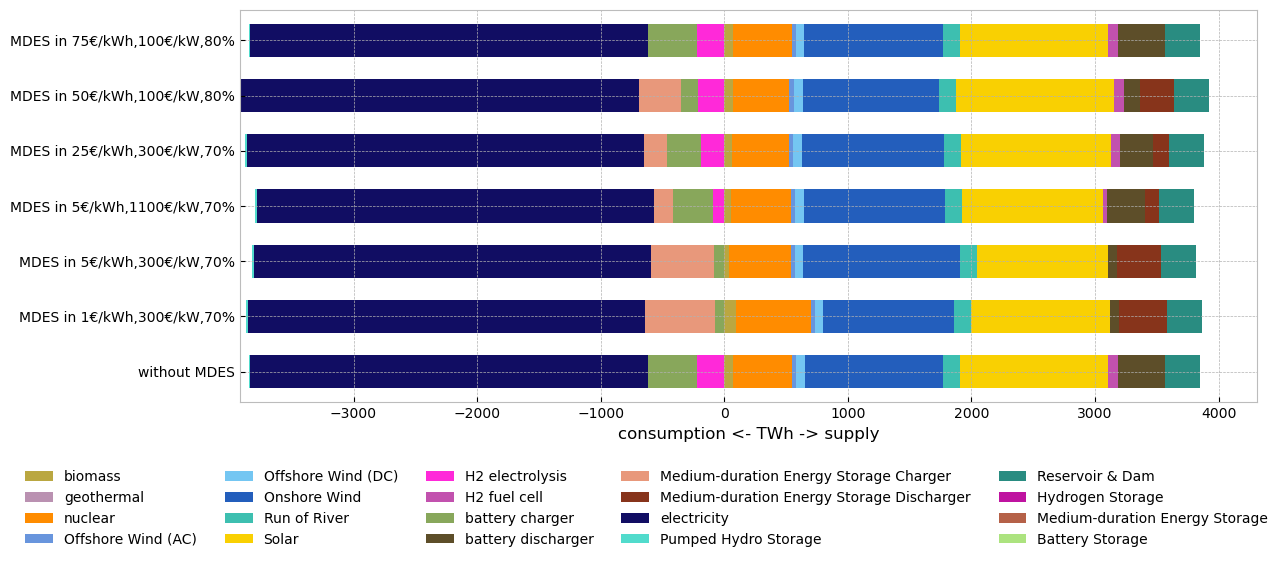

In [27]:
ax = plt.axes()
ax.set_facecolor("white")

df_balance.T.div(1e6).plot(ax=ax, kind='barh', color=df_balance.index.map(n1.carriers.color),stacked=True, width=0.6, figsize=(13, 6))
plt.legend(labels=df_balance.index.map(n1.carriers.nice_name),ncol=5,loc="lower center",bbox_to_anchor=(0.4,-0.4), frameon=False)
plt.xlabel("consumption <- TWh -> supply")
#plt.title("Energy Balance")
plt.tight_layout()
plt.savefig("Energy balance.pdf", dpi=750)
plt.show()

**Optimal Power Dispatch**

In order to investigate the operational behavoir, we selected a scenario without geographical constraints to represent the MDES deployment.

In [15]:
n5_11 = pypsa.Network("capacity/elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c5-mdes+c11-mdes+e0.7.nc")

INFO:pypsa.io:Imported network elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c5-mdes+c11-mdes+e0.7.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [16]:
def plot_dispatch(n, time, ax=None):
    p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
    sto_u = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
    sto = n.stores_t.p.groupby(n.stores.carrier, axis=1).sum().div(1e3)
    p = pd.concat([p_by_carrier, sto_u, sto], axis=1)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
        create_legend = True
    else:
        create_legend = False
        
    color = p.columns.map(n.carriers.color)
    p.where(p > 0).loc[time].plot.area(
        ax=ax,
        linewidth=0,
        color=color,
    )
    charge = p.where(p < 0).dropna(how="all", axis=1).loc[time]
    if not charge.empty:
        charge_color = charge.columns.map(n.carriers.color)
        charge.plot.area(
            ax=ax,
            linewidth=0,
            color=charge.columns.map(n.carriers.color),
        )
    # Create legend items
    if create_legend:
        legend_patches = [
        mpatches.Patch(color=color[i], label=label) for i, label in enumerate(
            p_by_carrier.columns.tolist() + ['PHS (dis)charge', 'hydro', 'H2 (dis)charge', 'MDES (dis)charge', 'battery (dis)charge']
        )]
        ax.legend(handles=legend_patches)
    else:
        ax.legend_= None

    n.loads_t.p_set.sum(axis=1).loc[time].div(1e3).plot(ax=ax, c="k")        
    ax.set_ylabel("GW")
    ax.set_ylim(-1000, 1000)

In [17]:
color_list =n5_11.generators.carrier.unique().tolist()+n5_11.storage_units.carrier.unique().tolist()+n5_11.stores.carrier.unique().tolist()
color = n5_11.carriers.color[color_list]

C:\Users\Joanna\AppData\Local\Temp\ipykernel_22136\364647900.py:2: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

C:\Users\Joanna\AppData\Local\Temp\ipykernel_22136\364647900.py:3: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

C:\Users\Joanna\AppData\Local\Temp\ipykernel_22136\364647900.py:4: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1608: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.

C:\Users\Joanna\AppData\Local\Temp\ipykernel_22136\364647900.py:2: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

C:\Users\Joanna\AppData\Local\Temp\ipykernel_22136\364647900.py:3: FutureWa

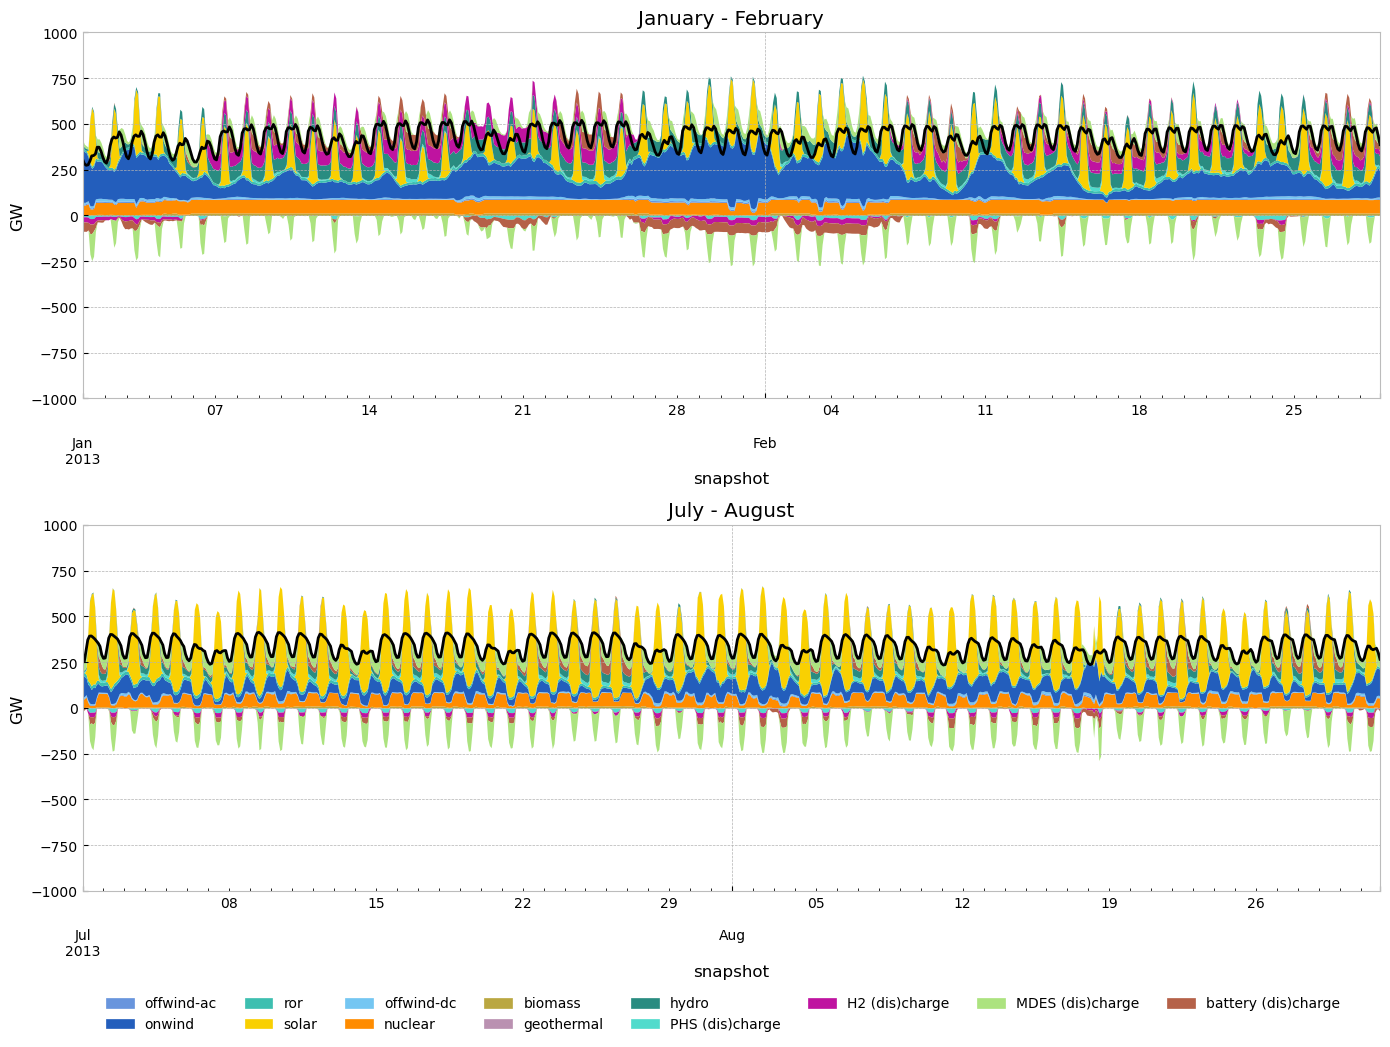

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
ax1.set_facecolor('white')
ax2.set_facecolor('white')

plot_dispatch(n5_11, time=slice('2013-01', '2013-02'), ax=ax1)
ax1.set_title('January - February')
plot_dispatch(n5_11, time=slice('2013-07', '2013-08'), ax=ax2)
ax2.set_title('July - August')

legend_patches = [
    mpatches.Patch(color=color[i], label=label) for i, label in enumerate(
        n5_11.generators.carrier.unique().tolist()
        + ['hydro','PHS (dis)charge', 'H2 (dis)charge', 'MDES (dis)charge', 'battery (dis)charge'])]
fig.subplots_adjust(bottom=0.2)
fig.legend(handles=legend_patches, loc="upper center", ncol=8, bbox_to_anchor=(0.52, 0.01), fontsize=10, frameon=False)
plt.tight_layout()
plt.savefig("Optimal Power Dispatch.pdf", dpi=750, bbox_inches='tight')
plt.show()

Another example

In [20]:
n25 = pypsa.Network("capacity/elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c25-mdes+c3-mdes+e0.7.nc")

INFO:pypsa.io:Imported network elec_s_37_ec_lv1.25_Co2L0-2H-EQ0.8c-MDES+c25-mdes+c3-mdes+e0.7.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


C:\Users\Joanna\AppData\Local\Temp\ipykernel_22136\364647900.py:2: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

C:\Users\Joanna\AppData\Local\Temp\ipykernel_22136\364647900.py:3: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

C:\Users\Joanna\AppData\Local\Temp\ipykernel_22136\364647900.py:4: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1608: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.

C:\Users\Joanna\AppData\Local\Temp\ipykernel_22136\364647900.py:2: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

C:\Users\Joanna\AppData\Local\Temp\ipykernel_22136\364647900.py:3: FutureWa

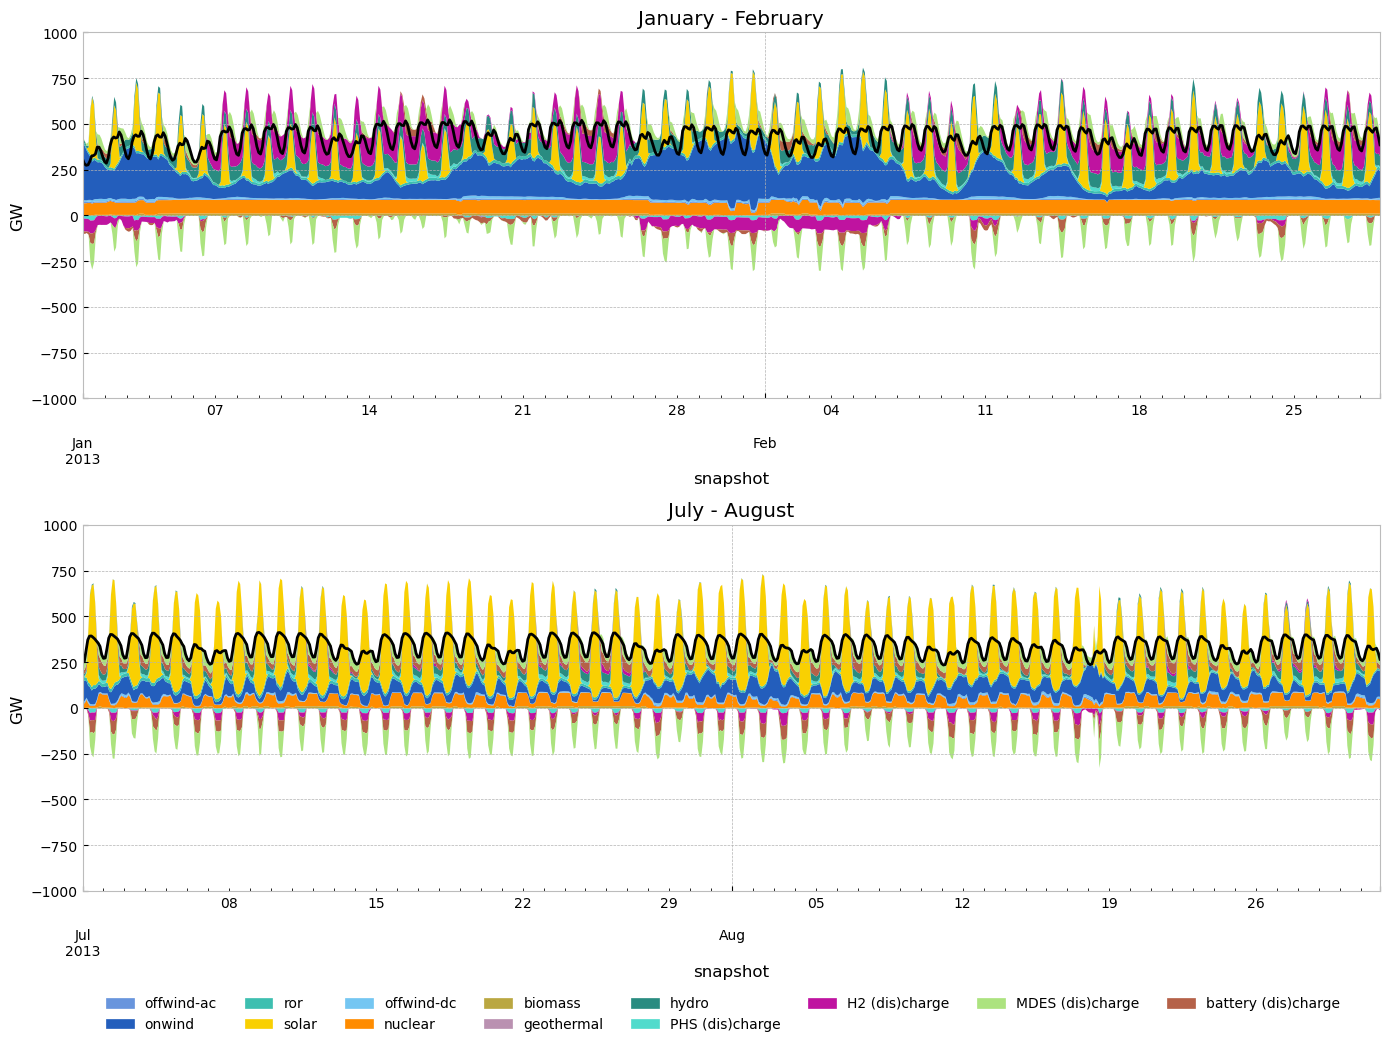

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
ax1.set_facecolor('white')
ax2.set_facecolor('white')

plot_dispatch(n25, time=slice('2013-01', '2013-02'), ax=ax1)
ax1.set_title('January - February')
plot_dispatch(n25, time=slice('2013-07', '2013-08'), ax=ax2)
ax2.set_title('July - August')

legend_patches = [
    mpatches.Patch(color=color[i], label=label) for i, label in enumerate(
        n25.generators.carrier.unique().tolist()
        + ['hydro','PHS (dis)charge', 'H2 (dis)charge', 'MDES (dis)charge', 'battery (dis)charge'])]
fig.subplots_adjust(bottom=0.2)
fig.legend(handles=legend_patches, loc="upper center", ncol=8, bbox_to_anchor=(0.52, 0.01), fontsize=10, frameon=False)
plt.tight_layout()
plt.show()

**Patterns of Storage Filling Levels for Storage Technologies**

In [19]:
soc = n5_11.stores_t.e.groupby(n5_11.stores.carrier, axis=1).sum()
soc.head()

C:\Users\Joanna\AppData\Local\Temp\ipykernel_22136\188703551.py:1: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



carrier,H2,MDES,battery
snapshot,,,
2013-01-01 00:00:00,4.559651e+07,1.276492e+07,182941.892251
2013-01-01 02:00:00,4.565335e+07,1.286607e+07,149371.342599
2013-01-01 04:00:00,4.571022e+07,1.296828e+07,120547.245669
2013-01-01 06:00:00,4.576722e+07,1.305097e+07,98068.625603
2013-01-01 08:00:00,4.582579e+07,1.315675e+07,320456.664891


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
soc_normalized = scaler.fit_transform(soc)

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is

In [34]:
normalized_d = pd.DataFrame(soc_normalized*100, columns=soc.columns, index=soc.index)
normalized_d

carrier,H2,MDES,battery
snapshot,,,
2013-01-01 00:00:00,95.632367,86.540283,19.093679
2013-01-01 02:00:00,95.751590,87.230220,15.589906
2013-01-01 04:00:00,95.870868,87.927412,12.581523
2013-01-01 06:00:00,95.990407,88.491459,10.235419
2013-01-01 08:00:00,96.113246,89.212988,33.446155
...,...,...,...
2013-12-31 14:00:00,95.081941,83.834631,79.471104
2013-12-31 16:00:00,95.177426,84.244185,61.417728
2013-12-31 18:00:00,95.289105,84.750277,45.713386


In [35]:
H2 = normalized_d.H2.to_frame()
MDES = normalized_d.MDES.to_frame()
battery = normalized_d.battery.to_frame()

In [36]:
H2['hour of day'] = H2.index.hour
H2['day of year'] = H2.index.date
MDES['hour of day'] = MDES.index.hour
MDES['day of year'] = MDES.index.date
battery['hour of day'] = battery.index.hour
battery['day of year'] = battery.index.date

In [37]:
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

In [38]:
pivot_H2 = H2.pivot(index='hour of day', columns='day of year', values='H2')
pivot_MDES = MDES.pivot(index='hour of day', columns='day of year', values='MDES')
pivot_battery = battery.pivot(index='hour of day', columns='day of year', values='battery')

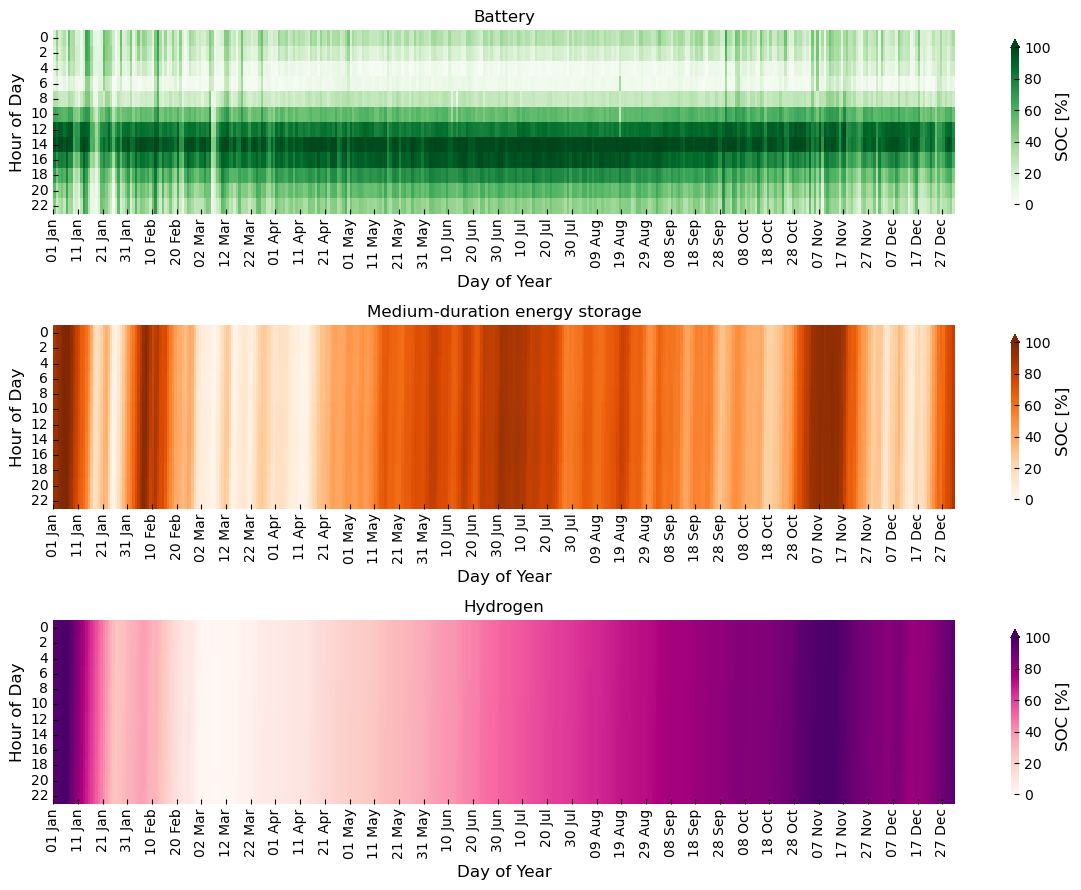

In [39]:
fig, axs = plt.subplots(3, 1, figsize=(12, 9))

# create first subplot for battery
sns.heatmap(pivot_battery, cmap='Greens', cbar=True, cbar_kws={"label": "SOC [%]", "shrink": 0.9, "extend": "max"}, ax=axs[0])
axs[0].set_title('Battery', fontsize=12)
axs[0].set_xlabel('Day of Year', fontsize=12)
axs[0].set_ylabel('Hour of Day', fontsize=12)
axs[0].tick_params(axis='x', labelsize=10)
axs[0].tick_params(axis='y', labelsize=10)
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
axs[0].xaxis.set_major_locator(MultipleLocator(base=10))
axs[0].grid(False)

# create second subplot for MDES
sns.heatmap(pivot_MDES, cmap='Oranges', cbar=True, cbar_kws={"label": "SOC [%]", "shrink": 0.9, "extend": "max"}, ax=axs[1])
axs[1].set_title('Medium-duration energy storage', fontsize=12)
axs[1].set_xlabel('Day of Year', fontsize=12)
axs[1].set_ylabel('Hour of Day', fontsize=12)
axs[1].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='y', labelsize=10)
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
axs[1].xaxis.set_major_locator(MultipleLocator(base=10))
axs[1].grid(False)

# create third subplot for H2
sns.heatmap(pivot_H2, cmap='RdPu', cbar=True, cbar_kws={"label": "SOC [%]", "shrink": 0.9, "extend": "max"}, ax=axs[2])
axs[2].set_title('Hydrogen', fontsize=12)
axs[2].set_xlabel('Day of Year', fontsize=12)
axs[2].set_ylabel('Hour of Day', fontsize=12)
axs[2].tick_params(axis='x', labelsize=10)
axs[2].tick_params(axis='y', labelsize=10)
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
axs[2].xaxis.set_major_locator(MultipleLocator(base=10))
axs[2].grid(False)

plt.tight_layout()
plt.savefig("Operations and storage filling levels of battery, MDES and H2.pdf")
plt.show()

**Regional Storage Filling Levels for Medium-Duration Energy Storage - Duration Curve**

In [40]:
filter_columns = n5_11.stores_t.e.columns[n5_11.stores_t.e.columns.str.contains("MDES")]

In [42]:
MDES_store = n5_11.stores_t.e[filter_columns]
MDES_store.head()

Store,AL1 0 MDES,AT1 0 MDES,BA1 0 MDES,BE1 0 MDES,BG1 0 MDES,CH1 0 MDES,CZ1 0 MDES,DE1 0 MDES,DK1 0 MDES,DK2 0 MDES,...,MK1 0 MDES,NL1 0 MDES,NO2 0 MDES,PL1 0 MDES,PT1 0 MDES,RO1 0 MDES,RS1 0 MDES,SE2 0 MDES,SI1 0 MDES,SK1 0 MDES
snapshot,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,8.139513,5.817049,3.560319,186865.587624,5.015208,8039.143575,11.570260,718616.616581,732623.885681,607007.617043,...,10.294708,2.413673e+06,26582.665338,775175.497895,7793.856736,4.522651,5.179288,109658.871280,3.375224,16.950155
2013-01-01 02:00:00,8.137366,5.856421,3.584619,188309.980993,5.013948,8121.913764,11.637601,726996.868882,740362.995549,612840.056473,...,10.288961,2.433682e+06,26582.669183,784249.034235,7852.960815,4.522163,5.175218,109658.876535,3.417197,16.996246
2013-01-01 04:00:00,8.135259,5.898805,3.609004,189754.374363,5.012820,8204.730489,11.704953,735377.120464,748102.101989,618672.494006,...,10.283176,2.453691e+06,26582.672981,793322.570585,7912.064887,4.521795,5.171111,109658.881729,3.459335,17.042302
2013-01-01 06:00:00,8.212561,5.941899,3.643650,191198.753029,5.060855,8287.546805,11.772225,743757.369200,748102.102667,624504.890807,...,10.379264,2.460371e+06,26582.676897,802396.106933,7971.168976,4.563433,5.220545,109658.886918,3.502511,17.088338
2013-01-01 08:00:00,8.290885,5.985720,3.679335,192643.137693,5.109627,8370.365022,11.839504,752137.619628,755841.184004,630337.323098,...,10.476412,2.480380e+06,26582.680814,811469.643284,8030.275563,4.605835,5.270806,109658.891804,3.546464,17.135004


In [43]:
sorted_col=[]
for col in MDES_store.columns:
    s = MDES_store[col].sort_values(ascending=False).reset_index(drop=True)
    sorted_col.append(s)
    
d_curve=pd.concat(sorted_col, axis=1)

In [44]:
d_curve

,AL1 0 MDES,AT1 0 MDES,BA1 0 MDES,BE1 0 MDES,BG1 0 MDES,CH1 0 MDES,CZ1 0 MDES,DE1 0 MDES,DK1 0 MDES,DK2 0 MDES,...,MK1 0 MDES,NL1 0 MDES,NO2 0 MDES,PL1 0 MDES,PT1 0 MDES,RO1 0 MDES,RS1 0 MDES,SE2 0 MDES,SI1 0 MDES,SK1 0 MDES
0,9.441881,8.373467,5.000447,207861.892639,5.801203,11432.931813,15.969736,1.057013e+06,920818.010189,736519.300884,...,11.599756,2.713704e+06,26583.934947,1.157026e+06,9359.210086,5.182474,6.042782,109659.709879,5.802911,19.962553
1,9.441620,8.372270,5.000176,207861.892346,5.800745,11432.930833,15.969334,1.057013e+06,920818.009558,736519.299408,...,11.599488,2.713704e+06,26583.934700,1.157026e+06,9359.208660,5.181907,6.042554,109659.708921,5.802459,19.962412
2,9.441509,8.372026,5.000036,207861.891471,5.800323,11432.930642,15.968391,1.057013e+06,920818.008804,736519.299304,...,11.599069,2.713704e+06,26583.934660,1.157026e+06,9359.207509,5.181651,6.042274,109659.708666,5.802383,19.961219
3,9.441229,8.371874,4.999833,207861.891351,5.800158,11432.930480,15.968276,1.057013e+06,920818.008588,736519.298804,...,11.598840,2.713704e+06,26583.933509,1.157026e+06,9359.199708,5.181434,6.042139,109659.705323,5.801861,19.960569
4,9.440605,8.371718,4.995814,207861.890882,5.799665,11432.930269,15.967970,1.057013e+06,920818.008587,736519.298715,...,11.598814,2.713704e+06,26583.896393,1.157026e+06,9359.197626,5.180775,6.041741,109659.661922,5.800510,19.960548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,0.001226,0.001040,0.001099,0.001170,0.001615,0.001054,0.000994,8.880841e-04,0.023086,0.004835,...,0.001231,1.235517e-03,0.011490,7.509786e-04,0.000899,0.001426,0.001091,0.605874,0.001164,0.001023
4376,0.001077,0.000882,0.001041,0.000804,0.001235,0.000874,0.000827,7.826901e-04,0.009094,0.003242,...,0.001083,1.234027e-03,0.011231,7.301769e-04,0.000555,0.001203,0.001041,0.005444,0.000968,0.000934
4377,0.000721,0.000636,0.000999,0.000723,0.001180,0.000452,0.000725,5.299061e-04,0.001646,0.001212,...,0.000775,9.592155e-04,0.010834,6.273247e-04,0.000540,0.001183,0.000943,0.004465,0.000862,0.000776
4378,0.000431,0.000430,0.000445,0.000700,0.000702,0.000379,0.000620,4.137241e-04,0.000467,0.000867,...,0.000424,4.824880e-04,0.001945,3.876759e-04,0.000486,0.000791,0.000491,0.001452,0.000548,0.000693


In [45]:
scaler = MinMaxScaler()
normalized_d = scaler.fit_transform(d_curve)
normalized_d = pd.DataFrame(normalized_d, columns=d_curve.columns)

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\Joanna\Anaconda\envs\esm-2023\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is

In [46]:
filtered=d_curve[d_curve.loc[0].nlargest(6).index]
filtered

,GB0 0 MDES,NL1 0 MDES,FR1 0 MDES,PL1 0 MDES,DE1 0 MDES,DK1 0 MDES
0,4.376797e+06,2.713704e+06,1.371571e+06,1.157026e+06,1.057013e+06,920818.010189
1,4.376797e+06,2.713704e+06,1.371571e+06,1.157026e+06,1.057013e+06,920818.009558
2,4.376797e+06,2.713704e+06,1.371571e+06,1.157026e+06,1.057013e+06,920818.008804
3,4.376797e+06,2.713704e+06,1.371571e+06,1.157026e+06,1.057013e+06,920818.008588
4,4.376797e+06,2.713704e+06,1.371571e+06,1.157026e+06,1.057013e+06,920818.008587
...,...,...,...,...,...,...
4375,2.749130e-03,1.235517e-03,7.881838e-04,7.509786e-04,8.880841e-04,0.023086
4376,1.195244e-03,1.234027e-03,7.648191e-04,7.301769e-04,7.826901e-04,0.009094
4377,1.024518e-03,9.592155e-04,5.263847e-04,6.273247e-04,5.299061e-04,0.001646
4378,8.230368e-04,4.824880e-04,5.086353e-04,3.876759e-04,4.137241e-04,0.000467


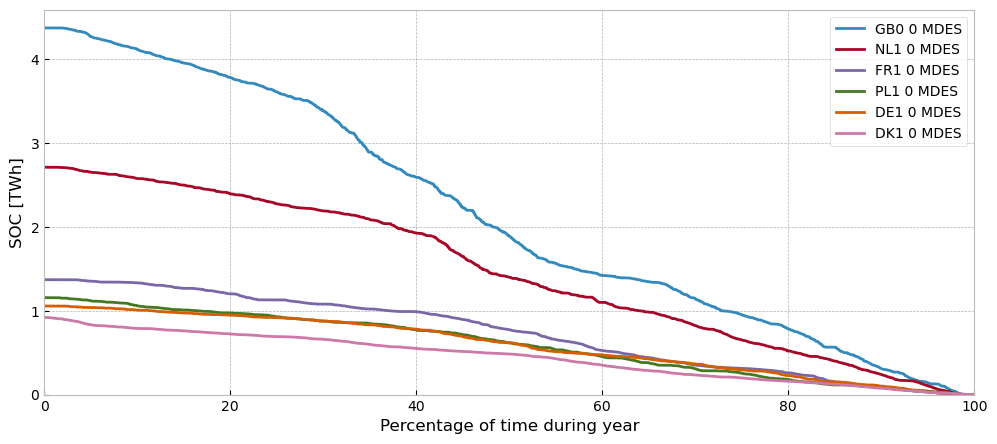

In [48]:
fig,ax = plt.subplots(figsize=(12,5))
ax.set_facecolor('white')

x = filtered.index/4380*100
for col in filtered.columns:
    y = filtered[col].div(1e6)
    ax.plot(x, y, label=col)
plt.xlim(0, 100)
plt.ylim(0, None)
ax.set_xlabel('Percentage of time during year',fontsize=12)
ax.set_ylabel('SOC [TWh]', fontsize=12)
ax.legend(facecolor='white')
# ax.set_title('duration curve of state of charge in different regions')
plt.savefig("duration curves of state of charge in different regions.pdf", dpi=750)
plt.show()